# Import librairies

In [1]:
import pandas as pd  # type: ignore
import numpy as np # type: ignore
import nbformat
import matplotlib # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import plotly.express as px # type: ignore
import plotly.io as pio # type: ignore
from scipy.stats import spearmanr # type: ignore
from scipy.stats import pearsonr # type: ignore
import scipy.stats as stats # type: ignore
from scipy.stats import chi2_contingency # type: ignore
from statsmodels.stats.weightstats import ztest # type: ignore
import contractions
import difflib
import emoji
import nltk
import re
import spacy
import unicodedata
from langdetect import detect, DetectorFactory
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

In [3]:
nltk.download('stopwords')
nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ghadachatti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/ghadachatti/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ghadachatti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ghadachatti/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/ghadachatti/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [5]:
details = pd.read_csv('book_details_clean.csv')
details.head()

,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,genres,num_ratings,num_reviews,average_rating,rating_distribution
0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,2005-07-16,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3292516,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8..."
1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,Paperback,2003-06-21,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,912,"['Young Adult', 'Fiction', 'Magic', 'Childrens...",3401709,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2..."
2,3,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,Hardcover,1997-06-26,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,309,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",10116247,163493,4.47,"{'5': '6,544,542', '4': '2,348,390', '3': '856..."
3,5,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...",Paperback,1999-07-08,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,435,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4215031,84959,4.58,"{'5': '2,892,322', '4': '970,190', '3': '287,7..."
4,6,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,Paperback,2000-07-08,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,734,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3718209,69961,4.57,"{'5': '2,500,070', '4': '899,496', '3': '259,7..."


In [6]:
#Visualiser la distribution en pourcenatge des notes moyennes des livres
# Définir des intervalles pour les notes moyennes (1 à 5)
bins = [1, 2, 3, 4, 5]
labels = ["1-2", "2-3", "3-4", "4-5"]
details['rating_bin'] = pd.cut(details['average_rating'], bins=bins, labels=labels, include_lowest=True)

# Calculer le nombre de livres par intervalle et convertir en pourcentage
bin_counts = details['rating_bin'].value_counts().sort_index()
bin_percent = (bin_counts / bin_counts.sum() * 100).reset_index()
bin_percent.columns = ['Intervalle', 'Pourcentage']

# Créer le pie chart
fig_pie = px.pie(
    bin_percent,
    names='Intervalle',
    values='Pourcentage',
    color_discrete_sequence=['#96A397', '#4A4A4A'],   # Palette de couleurs alternés
    labels={'Intervalle': 'Intervalle de notes'}
)

# Personnaliser le layout : fond et couleur du texte
fig_pie.update_layout(
    plot_bgcolor="#E6E2D2",
    paper_bgcolor="#E6E2D2",
    font=dict(color="#4A4A4A"),
    legend_title_text='Intervalle de notes'
)

# Afficher les labels avec le label et le pourcentage arrondi (en blanc)
fig_pie.update_traces(
    texttemplate='%{label}<br>%{percent:.0%}',
    textfont=dict(color='white')
)

fig_pie.show()

# Corrélation entre la note moyenne et le nombre de reviews

In [7]:
#Visualiser les données
fig_corr = px.scatter(details, x="num_reviews", y="average_rating", trendline="ols",
                 title="Relation entre Nombre de Reviews et Note Moyenne",
                 labels={"num_reviews": "Nombre de Reviews", "average_rating": "Note Moyenne"})

fig_corr.show()

Pour étudier la coorélation entre la notation et le nombre de reviews, on va faire deux catégories:
-livres ayant reçu des notes moyennes >=4

-livres ayant reçu des notes moyennes < 4

**Hypothèse (H₀)** Le nombre de reviews (num_reviews) est significativement plus élevé pour les livres avec une note moyenne (average_rating) ≥ 4.

**Hypothèse alternative (H₁)** Le nombre de reviews (num_reviews) n'est pas nécessairement plus élevé pour les livres ayant une note moyenne (average_rating) ≥ 4

In [8]:
#Séparer les groupes
groupe_excellent = details[details["average_rating"] >= 4]["num_reviews"]
groupe_mediocre = details[details["average_rating"] < 4]["num_reviews"]

In [9]:
# Test de normalité avec shapiro
shapiro_high = stats.shapiro(groupe_excellent)
shapiro_low = stats.shapiro(groupe_mediocre)

print(f"Shapiro test (>=4) p-value: {shapiro_high.pvalue:.4f}")
print(f"Shapiro test (<4) p-value: {shapiro_low.pvalue:.4f}")

# Choix du test statistique
if shapiro_high.pvalue > 0.05 and shapiro_low.pvalue > 0.05:
    print("Données normales, utilisation du T-test")
    test_stat, p_value = stats.ttest_ind(groupe_excellent,groupe_mediocre, equal_var=False)
else:
    print("Données non normales, utilisation du test de Mann-Whitney")
    test_stat, p_value = stats.mannwhitneyu(groupe_excellent,groupe_mediocre, alternative='greater')

#Affichage des résultats
print(f"Test statistique: {test_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Shapiro test (>=4) p-value: 0.0000
Shapiro test (<4) p-value: 0.0000
Données non normales, utilisation du test de Mann-Whitney
Test statistique: 33533073.5000
P-value: 0.0000


/opt/anaconda3/envs/book_review_analysis/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8803.

/opt/anaconda3/envs/book_review_analysis/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7310.



Le test de Mann-Whitney vérifie si la distribution de num_reviews est différente entre les groupes (average_rating ≥ 4 vs < 4)
P-value: 0.0000
On rejette donc H0, ce qui signifie que les livres avec average_rating ≥ 4 n'ont pas nécessairement plus de reviews
H1 est validée : Le nombre de reviews (num_reviews) n'est pas nécessairement plus élevé pour les livres ayant une note moyenne (average_rating)≥4

In [10]:
# Ajouter une colonne catégorielle au dataframe details
details["rating_group"] = details["average_rating"].apply(lambda x: ">=4" if x >= 4 else "<4")

# Création du boxplot interactif
fig_hyp = px.box(
    details,
    x="rating_group",
    y="num_reviews",
    title="Distribution du nombre de reviews en fonction de la note moyenne",
    labels={"rating_group": "Note moyenne", "num_reviews": "Nombre de reviews"},
    color="rating_group"  # Ajoute une couleur par groupe
)



fig_hyp.show()

# Analyse des sentiments

In [11]:
reviews = pd.read_csv('/Users/ghadachatti/Documents/Data/ Projects/Sentimental analysis/Book_reviews_clean.csv')

In [12]:
reviews.head()

,Unnamed: 0,book_id,reviewer_id,likes_on_review,review_content,reviewer_followers,reviewer_total_reviews,review_date,review_rating
0,0,57094644,114413220,582,Just when you thought he was done writing book...,7961,234,2021-02-24,0
1,1,57094644,48328025,329,Would you be shocked if I told you this was th...,12100,1802,2024-03-17,5
2,2,57094644,6728955,232,So you're telling me Anaisn'ta Daughter of Pos...,490,1263,2022-09-05,3
3,3,57094644,101179363,218,"*inserts vine ""anything for you, beyoncé""*upda...",2709,458,2021-06-03,0
4,4,2948832,48727754,174,i was excited about this one since it was so w...,55100,1139,2021-06-09,2


In [13]:
df_reviews = reviews[["book_id", "review_content", "review_rating"]]
df_reviews.head()

,book_id,review_content,review_rating
0,57094644,Just when you thought he was done writing book...,0
1,57094644,Would you be shocked if I told you this was th...,5
2,57094644,So you're telling me Anaisn'ta Daughter of Pos...,3
3,57094644,"*inserts vine ""anything for you, beyoncé""*upda...",0
4,2948832,i was excited about this one since it was so w...,2


In [14]:
#Chargement du modèle spaCy et des stopwords NLTK
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))

In [19]:
#clean text & remove formatting chars functions 
def remove_formatting_chars(text):
    return ''.join(ch for ch in text if unicodedata.category(ch) != 'Cf')

def clean_text(text):
    # Normalize text
    text = unicodedata.normalize('NFKC', text)
    # Remove invisible or formatting characters
    text = remove_formatting_chars(text)
    # Convert to lowercase
    text = text.lower()
    # Remove numbers by replacing sequences of digits with an empty string
    text = re.sub(r'\d+', ' ', text)
    # Expand contractions
    text = contractions.fix(text)
    # Remove emojis
    text = emoji.demojize(text)
    # Remove email addresses and URLs
    text = re.sub(r'\b\S+@\S+\b', ' ', text)  # remove emails
    text = re.sub(r'http\S+|www\.\S+', ' ', text)  # remove urls
    # Replace punctuation (except period) with a space
    text = re.sub(r'[!"#$%&\'()*+,\-./:;<=>?@[\\\]^_`{|}~]', ' ', text)
    # Remove multiple spaces and trim the text
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Set seed for reproducibility
DetectorFactory.seed = 0

def detect_language(text):
    try:
        return detect(text)
    except Exception:
        return None

In [20]:
%%time
df_reviews.loc[:, "review_content_clean"] = df_reviews["review_content"].apply(clean_text)

CPU times: user 1min 6s, sys: 609 ms, total: 1min 7s
Wall time: 1min 7s


<timed exec>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
df_reviews[df_reviews["review_content_clean"]==""]

,book_id,review_content,review_rating,review_content_clean
19401,2880715,http://www.jrward.com/bdb/slices.htmlIJustCan'...,5,


- ADJ  adjective             new, good, high, special, big, local
- ADP  adposition            on, of, at, with, by, into, under
- ADV  adverb                really, already, still, early, now
- CONJ conjunction           and, or, but, if, while, although
- DET  determiner, article   the, a, some, most, every, no, which
- NOUN noun                  year, home, costs, time, Africa
- NUM  numeral               twenty-four, fourth, 1991, 14:24
- PRT  particle              at, on, out, over per, that, up, with
- PRON pronoun               he, their, her, its, my, I, us
- VERB verb                  is, say, told, given, playing, would
- .    punctuation marks     . , ; !
- X    others

In [22]:
%%time
df_reviews.loc[:, 'lang'] = df_reviews['review_content'].apply(detect_language)

CPU times: user 2min 38s, sys: 1.4 s, total: 2min 39s
Wall time: 2min 40s


<timed exec>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
df_reviews.shape

(63014, 5)

In [24]:
df_reviews_en = df_reviews[df_reviews["lang"] == "en"]

In [25]:
df_reviews_en.shape

(62938, 5)

In [26]:
df_reviews[df_reviews["lang"] != "en"]

,book_id,review_content,review_rating,review_content_clean,lang
76,14029,Utsukushisa to Kanashimi to = Beauty and Sadne...,5,utsukushisa to kanashimi to beauty and sadness...,fa
618,36072,The 7 Habits of Highly Effective People = The ...,4,the habits of highly effective people the seve...,fa
1105,91477,sold continuation,4,sold continuation,it
1821,6534,English (Postmortem) / Italiano«It was raining...,3,english postmortem italiano«it was raining in ...,it
2013,40119231,i need to lie down,5,i need to lie down,pl
...,...,...,...,...,...
57013,779021,The Happy Prince and Other Tales‬ = The Happy ...,4,the happy prince and other tales the happy pri...,fa
58451,55475465,connor my hubby,4,connor my hubby,cy
59780,6393631,WONDERFUL!! My daughter and I have enjoyed so ...,5,wonderful my daughter and i have enjoyed so mu...,it
59878,3386946,Seconda raccolta di racconti del ciclo di Fafh...,2,seconda raccolta di racconti del ciclo di fafh...,it


In [27]:
# Fonction pour lemmatiser une phrase et conserver uniquement certains types de mots (ex : adjectifs)
lmtzr = WordNetLemmatizer()

def keep_tags(sentence, keep_tags=("ADJ")): # keep_tags=("ADJ", "NOUN", "VERB")):
  l = [lmtzr.lemmatize(w)  for w, t in pos_tag(word_tokenize(sentence.lower()), tagset='universal') if t in keep_tags and w not in stopwords.words('english')]
  return " ".join(l)

In [28]:
df1 = df_reviews_en[df_reviews_en["review_rating"] == 1]
df5 = df_reviews_en[df_reviews_en["review_rating"] == 5]

In [29]:
df1.head()

,book_id,review_content,review_rating,review_content_clean,lang
13,53288434,This concept needs to be confiscated from Sara...,1,this concept needs to be confiscated from sara...,en
18,359375,"2022: Yeah, naive me in 2014 thought there was...",1,yeah naive me in thought there was no need to ...,en
26,20758104,Things that didn't bother me:The grammar and m...,1,things that did not bother me the grammar and ...,en
43,104089,"I hated this book, but I'm an oddity; in fact,...",1,i hated this book but i am an oddity in fact v...,en
49,100365,This book gave me a really bad vibe from the o...,1,this book gave me a really bad vibe from the o...,en


In [30]:
df5.head()

,book_id,review_content,review_rating,review_content_clean,lang
1,57094644,Would you be shocked if I told you this was th...,5,would you be shocked if i told you this was th...,en
6,2948832,I'm on a winning streak with these Lisa Kleypa...,5,i am on a winning streak with these lisa kleyp...,en
7,2948832,"Generally, I'm not a fan of tortured heroes. S...",5,generally i am not a fan of tortured heroes su...,en
8,2948832,“Is there heart here?”5 stars without a doubt....,5,“is there heart here ” stars without a doubt t...,en
9,298663,This book was recommended to me by someone who...,5,this book was recommended to me by someone who...,en


In [31]:
#Initialiser VADER sentiment analyzer sur df1
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores
# Appliquer l'analyse de sentiment à chaque review
df1.loc[:, 'score'] = df1['review_content_clean'].apply(get_sentiment) # type: ignore

/var/folders/z5/9x829vv5067_pmg11pv84_8r0000gn/T/ipykernel_77624/1374498330.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
# Extraction des scores des sentiments (VADER)
df1['negative'] = df1['score'].apply(lambda txt: txt['neg'])
df1['neutral']  = df1['score'].apply(lambda txt: txt['neu'])
df1['positive'] = df1['score'].apply(lambda txt: txt['pos'])
df1['compound'] = df1['score'].apply(lambda txt: txt['compound'])

/var/folders/z5/9x829vv5067_pmg11pv84_8r0000gn/T/ipykernel_77624/479456908.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z5/9x829vv5067_pmg11pv84_8r0000gn/T/ipykernel_77624/479456908.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z5/9x829vv5067_pmg11pv84_8r0000gn/T/ipykernel_77624/479456908.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [33]:
df1 = df1.drop('score', axis=1)

In [34]:
df1.head()

,book_id,review_content,review_rating,review_content_clean,lang,negative,neutral,positive,compound
13,53288434,This concept needs to be confiscated from Sara...,1,this concept needs to be confiscated from sara...,en,0.108,0.804,0.088,-0.9845
18,359375,"2022: Yeah, naive me in 2014 thought there was...",1,yeah naive me in thought there was no need to ...,en,0.129,0.723,0.148,0.9882
26,20758104,Things that didn't bother me:The grammar and m...,1,things that did not bother me the grammar and ...,en,0.172,0.706,0.121,-0.9880
43,104089,"I hated this book, but I'm an oddity; in fact,...",1,i hated this book but i am an oddity in fact v...,en,0.172,0.717,0.111,-0.9912
49,100365,This book gave me a really bad vibe from the o...,1,this book gave me a really bad vibe from the o...,en,0.104,0.816,0.080,-0.9858


In [35]:
#Initialiser VADER sentiment analyzer sur df5
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores

df5.loc[:, 'score'] = df5['review_content_clean'].apply(get_sentiment)

/var/folders/z5/9x829vv5067_pmg11pv84_8r0000gn/T/ipykernel_77624/463080869.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
#Extraction des scores des sentiments (VADER) sur df5
df5['negative'] = df5['score'].apply(lambda txt: txt['neg'])
df5['neutral']  = df5['score'].apply(lambda txt: txt['neu'])
df5['positive'] = df5['score'].apply(lambda txt: txt['pos'])
df5['compound'] = df5['score'].apply(lambda txt: txt['compound'])

/var/folders/z5/9x829vv5067_pmg11pv84_8r0000gn/T/ipykernel_77624/2738254903.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z5/9x829vv5067_pmg11pv84_8r0000gn/T/ipykernel_77624/2738254903.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z5/9x829vv5067_pmg11pv84_8r0000gn/T/ipykernel_77624/2738254903.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [37]:
df5 = df5.drop('score', axis=1)

In [38]:
df5.head()

,book_id,review_content,review_rating,review_content_clean,lang,negative,neutral,positive,compound
1,57094644,Would you be shocked if I told you this was th...,5,would you be shocked if i told you this was th...,en,0.073,0.698,0.230,0.9984
6,2948832,I'm on a winning streak with these Lisa Kleypa...,5,i am on a winning streak with these lisa kleyp...,en,0.079,0.665,0.255,0.9994
7,2948832,"Generally, I'm not a fan of tortured heroes. S...",5,generally i am not a fan of tortured heroes su...,en,0.130,0.624,0.245,0.9993
8,2948832,“Is there heart here?”5 stars without a doubt....,5,“is there heart here ” stars without a doubt t...,en,0.059,0.686,0.254,0.9802
9,298663,This book was recommended to me by someone who...,5,this book was recommended to me by someone who...,en,0.077,0.754,0.169,0.9864


In [39]:
#Merge des deux dataframes
df_sentiment = pd.concat([df1, df5], axis=0)
df_sentiment = df_sentiment.reset_index(drop=True)

In [40]:
df_sentiment.head()

,book_id,review_content,review_rating,review_content_clean,lang,negative,neutral,positive,compound
0,53288434,This concept needs to be confiscated from Sara...,1,this concept needs to be confiscated from sara...,en,0.108,0.804,0.088,-0.9845
1,359375,"2022: Yeah, naive me in 2014 thought there was...",1,yeah naive me in thought there was no need to ...,en,0.129,0.723,0.148,0.9882
2,20758104,Things that didn't bother me:The grammar and m...,1,things that did not bother me the grammar and ...,en,0.172,0.706,0.121,-0.9880
3,104089,"I hated this book, but I'm an oddity; in fact,...",1,i hated this book but i am an oddity in fact v...,en,0.172,0.717,0.111,-0.9912
4,100365,This book gave me a really bad vibe from the o...,1,this book gave me a really bad vibe from the o...,en,0.104,0.816,0.080,-0.9858


# Corrélation entre la note moyenne et le sentiment

Dans le dataframe df_sentiment, nous avons la colonne compound une mesure globale entre -1 et +1 qui combinent les 3 scores du plus négatif au plus positif

Pour étudier cette corrélation, l'idée est de faire un merge entre df_sentiment et details pour avoir pour chaque titre de livre l'analyse des sentiments pour que chaque livre aurait son analyse de sentiments

In [41]:
#Afficher les doublons dans details
duplicates = details[details.duplicated(subset=["book_title"], keep=False)]

In [42]:
duplicates[['book_id','book_title']]

,book_id,book_title
1,2,Harry Potter and the Order of the Phoenix
17,33,The Lord of the Rings
18,34,The Fellowship of the Ring
20,58,Changeling
21,61,The Changeling
...,...,...
16030,150346434,Ensnared
16038,158532086,Down and Rising
16051,180993240,Fated to Love You
16052,181100250,Fated to Love You


In [43]:
#Merge entre details et df_sentiment
merge = pd.merge(details, df_sentiment, on='book_id', how='inner')
merge.head()

,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,genres,...,rating_bin,rating_group,review_content,review_rating,review_content_clean,lang,negative,neutral,positive,compound
0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,2005-07-16,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",...,4-5,>=4,(A) 86%| ExtraordinaryNotes:A relationshippy r...,5,a extraordinarynotes a relationshippy respite ...,en,0.116,0.735,0.149,0.9985
1,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,2005-07-16,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",...,4-5,>=4,(A) 86%| ExtraordinaryNotes:It dwells on the d...,5,a extraordinarynotes it dwells on the delightf...,en,0.050,0.780,0.170,0.5574
2,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,2005-07-16,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",...,4-5,>=4,i dont want to talk to anyonedont even look at...,5,i do not want to talk to anyonedont even look ...,en,0.164,0.729,0.107,-0.0829
3,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,Paperback,2003-06-21,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,912,"['Young Adult', 'Fiction', 'Magic', 'Childrens...",...,4-5,>=4,(A) 86%| ExtraordinaryNotes:An angsty apprehen...,5,a extraordinarynotes an angsty apprehension it...,en,0.105,0.775,0.120,0.9885
4,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,Paperback,2003-06-21,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,912,"['Young Adult', 'Fiction', 'Magic', 'Childrens...",...,4-5,>=4,"Seriously, don't read this review if you haven...",5,seriously do not read this review if you have ...,en,0.103,0.777,0.120,0.9628


In [44]:
#Garder les colonnes dont j'ai besoin sur merge_clean
merge_clean = merge.drop(columns=['review_content','review_rating','lang'])
merge_clean.head()

,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,genres,...,num_reviews,average_rating,rating_distribution,rating_bin,rating_group,review_content_clean,negative,neutral,positive,compound
0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,2005-07-16,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",...,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",4-5,>=4,a extraordinarynotes a relationshippy respite ...,0.116,0.735,0.149,0.9985
1,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,2005-07-16,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",...,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",4-5,>=4,a extraordinarynotes it dwells on the delightf...,0.050,0.780,0.170,0.5574
2,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,2005-07-16,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",...,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",4-5,>=4,i do not want to talk to anyonedont even look ...,0.164,0.729,0.107,-0.0829
3,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,Paperback,2003-06-21,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,912,"['Young Adult', 'Fiction', 'Magic', 'Childrens...",...,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2...",4-5,>=4,a extraordinarynotes an angsty apprehension it...,0.105,0.775,0.120,0.9885
4,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,Paperback,2003-06-21,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,912,"['Young Adult', 'Fiction', 'Magic', 'Childrens...",...,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2...",4-5,>=4,seriously do not read this review if you have ...,0.103,0.777,0.120,0.9628


In [45]:
#Nettoyer les doublons sur merge_clean
duplicates_merge_clean = merge_clean[merge_clean.duplicated(subset=["book_title"], keep=False)]
duplicates_merge_clean.head()

,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,genres,...,num_reviews,average_rating,rating_distribution,rating_bin,rating_group,review_content_clean,negative,neutral,positive,compound
0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,2005-07-16,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",...,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",4-5,>=4,a extraordinarynotes a relationshippy respite ...,0.116,0.735,0.149,0.9985
1,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,2005-07-16,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",...,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",4-5,>=4,a extraordinarynotes it dwells on the delightf...,0.050,0.780,0.170,0.5574
2,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,2005-07-16,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",...,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",4-5,>=4,i do not want to talk to anyonedont even look ...,0.164,0.729,0.107,-0.0829
3,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,Paperback,2003-06-21,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,912,"['Young Adult', 'Fiction', 'Magic', 'Childrens...",...,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2...",4-5,>=4,a extraordinarynotes an angsty apprehension it...,0.105,0.775,0.120,0.9885
4,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,Paperback,2003-06-21,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,912,"['Young Adult', 'Fiction', 'Magic', 'Childrens...",...,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2...",4-5,>=4,seriously do not read this review if you have ...,0.103,0.777,0.120,0.9628


In [46]:
merge_clean.shape

(29424, 21)

In [47]:
df_sentiment.shape

(29473, 9)

In [48]:
# Group by par book_title et author pour obtenir la moyenne de average_rating et sentiment

merged_clean_agg = merge_clean.groupby(["book_title", "author"]).agg({
    "average_rating": "mean",
    "compound": "mean"
}).reset_index()

In [49]:
merged_clean_agg.shape

(12097, 4)

In [50]:
merged_clean_agg.head()

,book_title,author,average_rating,compound
0,"""A Problem from Hell"": America and the Age of ...",Samantha Power,4.26,-0.998000
1,"""Look Here, Sir, What a Curious Bird"": Searchi...",Paul Spencer Sochaczewski,4.32,0.966833
2,"""Surely You're Joking, Mr. Feynman!"": Adventur...",Richard P. Feynman,4.27,0.441900
3,#Girlboss,Sophia Amoruso,3.64,0.901600
4,'Salem's Lot,Stephen King,4.26,0.688267


Maintenant nous avons une table aggregé par book_title et author, on met notre hypothèse
- **H0** Les livres ayant des avis positifs ont une note moyenne (average rating) plus élevée que ceux ayant des avis négatifs

- **H1**  Un avis positif ou négatif ne se traduit pas systématiquement par une note plus haute ou plus basse

In [51]:
# Paramètres
seuil_compound = 0  
alpha = 0.05

# Segmentation
positive = merged_clean_agg[merged_clean_agg['compound'] > seuil_compound]['average_rating']
negative = merged_clean_agg[merged_clean_agg['compound'] <= seuil_compound]['average_rating']

# Test Z + vérification des effectifs
z_stat, p_value = ztest(positive, negative, alternative='larger')
n_pos, n_neg = len(positive), len(negative)
mean_pos, mean_neg = positive.mean(), negative.mean()

# Affichage détaillé
print(f"Taille des groupes : Positif = {n_pos}, Négatif = {n_neg}")
print(f"Notes moyennes : Positif = {mean_pos:.2f}, Négatif = {mean_neg:.2f}")
print(f"Résultat du test Z : Statistique = {z_stat:.3f}, p-value = {p_value:.3e}")
print("Conclusion :", "Rejet de H0" if p_value < alpha else "Échec du rejet de H0")

Taille des groupes : Positif = 9711, Négatif = 2386
Notes moyennes : Positif = 4.06, Négatif = 3.97
Résultat du test Z : Statistique = 13.959, p-value = 1.378e-44
Conclusion : Rejet de H0


In [52]:
# Créer une nouvelle colonne 'sentiment_category' en fonction du seuil défini
seuil = 0
merged_clean_agg['avis'] = merged_clean_agg['compound'].apply(lambda x: 'positive' if x > seuil else 'negative')
merged_clean_agg.head()

,book_title,author,average_rating,compound,avis
0,"""A Problem from Hell"": America and the Age of ...",Samantha Power,4.26,-0.998000,negative
1,"""Look Here, Sir, What a Curious Bird"": Searchi...",Paul Spencer Sochaczewski,4.32,0.966833,positive
2,"""Surely You're Joking, Mr. Feynman!"": Adventur...",Richard P. Feynman,4.27,0.441900,positive
3,#Girlboss,Sophia Amoruso,3.64,0.901600,positive
4,'Salem's Lot,Stephen King,4.26,0.688267,positive


In [53]:
#Visualization box plot
fig_avis = px.box(merged_clean_agg,
             x='avis',
             y='average_rating',
             title="Distribution de la note moyenne par avis",
             labels={'avis': "Catégorie d'avis", 'average_rating': 'Note moyenne'},
             color='avis')

fig_avis.show()

In [54]:
#Visualization
# Créer un diagramme en violon avec boîte à moustaches et points individuels
fig_avis1 = px.violin(
    merged_clean_agg,
    x='avis',
    y='average_rating',
    color='avis',
    box=True,             # Afficher la boîte à moustaches
    points='all',         # Afficher tous les points individuels
    title="Distribution des notes moyennes selon la catégorie d'avis",
    labels={'avis': "Catégorie d'avis", 'average_rating': 'Note moyenne'}
)

fig_avis1.show()

- En se basant sur ces deux graphes, nous avons une distribution des données qui permet de comparer visuellement les tendances entre les livres à avis positifs et négatifs.
- Les avis positifs ne se traduisent pas systématiquement par une note plus haute par rapport aux avis négatifs

# Corrélation entre la note moyenne et le format

- H0: Le format de livre n'impacte pas sa note
- H1: le format du livre impacte sa note

In [55]:
#Faire des catégories pour la note moyenne (average_rating)
merged_clean_agg["rating_category"] = pd.qcut(
    merged_clean_agg["average_rating"], q=3, labels=["0", "1", "2"])

In [56]:
merged_clean_agg.head()

,book_title,author,average_rating,compound,avis,rating_category
0,"""A Problem from Hell"": America and the Age of ...",Samantha Power,4.26,-0.998000,negative,2
1,"""Look Here, Sir, What a Curious Bird"": Searchi...",Paul Spencer Sochaczewski,4.32,0.966833,positive,2
2,"""Surely You're Joking, Mr. Feynman!"": Adventur...",Richard P. Feynman,4.27,0.441900,positive,2
3,#Girlboss,Sophia Amoruso,3.64,0.901600,positive,0
4,'Salem's Lot,Stephen King,4.26,0.688267,positive,2


In [57]:
#Le format existe dans le dataframe merge_clean
merge_clean.head()

,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,genres,...,num_reviews,average_rating,rating_distribution,rating_bin,rating_group,review_content_clean,negative,neutral,positive,compound
0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,2005-07-16,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",...,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",4-5,>=4,a extraordinarynotes a relationshippy respite ...,0.116,0.735,0.149,0.9985
1,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,2005-07-16,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",...,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",4-5,>=4,a extraordinarynotes it dwells on the delightf...,0.050,0.780,0.170,0.5574
2,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,2005-07-16,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",...,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",4-5,>=4,i do not want to talk to anyonedont even look ...,0.164,0.729,0.107,-0.0829
3,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,Paperback,2003-06-21,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,912,"['Young Adult', 'Fiction', 'Magic', 'Childrens...",...,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2...",4-5,>=4,a extraordinarynotes an angsty apprehension it...,0.105,0.775,0.120,0.9885
4,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,Paperback,2003-06-21,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,912,"['Young Adult', 'Fiction', 'Magic', 'Childrens...",...,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2...",4-5,>=4,seriously do not read this review if you have ...,0.103,0.777,0.120,0.9628


In [58]:
merge_clean['format'].value_counts()

format
Paperback                 17376
 Hardcover                 8242
 Kindle Edition            2685
ebook                       778
Audio                        95
Library Binding              52
Nook                         35
 Unknown Binding             22
Audiobook                    21
 Board Book                  17
 Leather Bound               16
MP3 CD                       14
 Board book                  12
 Slipcased Hardcover          8
 Webnovel                     8
 Comics                       7
 paperback                    4
 Blue Pew Edition             3
 cloth                        3
 Boxed Set - Hardcover        3
 Mass Market Paberback        2
 Hardback                     2
 Diary                        2
MP3 Audio                     2
 A 5                          2
 web                          2
 Pocket Book                  2
MP3 Book                      2
 Brochura                     2
 Comic                        1
Audiocd                       1
 

In [59]:
merge_clean['format'] = merge_clean['format'].str.replace(' ', '', regex=True)

In [60]:
# Création de liste des différents format
audio_formats= ["Audio","Audiobook","MP3CD","MP3Audio","Audiocd","Podiobook","MP3Book"]
digital_formats = ["KindleEdition","ebook","Nook","PocketBook","web","Webnovel","DVD"]
paper_formats = ["paper","hardcover","softcover","Novel","Comic","Brochura","A5","Paper","cloth","MassMarketPaberback","Diary","BluePewEdition","paperback","BoxedSet-Hardcover","Hardback","SlipcasedHardcover","Comics","LeatherBound","Boardbook","BoardBook","UnknownBinding","LibraryBinding","Hardcover","Paperback"]
conditions = [
merge_clean['format'].isin(audio_formats),
merge_clean['format'].isin(digital_formats),
merge_clean['format'].isin(paper_formats)
]
# Choix des valeurs
choices = ['Audio', 'Digital','Paper']
merge_clean['format_agg'] = np.select(conditions, choices, default='')

In [61]:
merge_clean['format_agg'].value_counts()

format_agg
Paper      25778
Digital     3510
Audio        136
Name: count, dtype: int64

Nous avons rassemblé les différents formats en seulement 3 types de format

In [62]:
merge_clean.head()

,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,genres,...,average_rating,rating_distribution,rating_bin,rating_group,review_content_clean,negative,neutral,positive,compound,format_agg
0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,2005-07-16,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",...,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",4-5,>=4,a extraordinarynotes a relationshippy respite ...,0.116,0.735,0.149,0.9985,Paper
1,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,2005-07-16,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",...,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",4-5,>=4,a extraordinarynotes it dwells on the delightf...,0.050,0.780,0.170,0.5574,Paper
2,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,2005-07-16,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",...,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",4-5,>=4,i do not want to talk to anyonedont even look ...,0.164,0.729,0.107,-0.0829,Paper
3,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,Paperback,2003-06-21,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,912,"['Young Adult', 'Fiction', 'Magic', 'Childrens...",...,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2...",4-5,>=4,a extraordinarynotes an angsty apprehension it...,0.105,0.775,0.120,0.9885,Paper
4,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,Paperback,2003-06-21,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,912,"['Young Adult', 'Fiction', 'Magic', 'Childrens...",...,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2...",4-5,>=4,seriously do not read this review if you have ...,0.103,0.777,0.120,0.9628,Paper


In [63]:
merged_clean_agg.head()

,book_title,author,average_rating,compound,avis,rating_category
0,"""A Problem from Hell"": America and the Age of ...",Samantha Power,4.26,-0.998000,negative,2
1,"""Look Here, Sir, What a Curious Bird"": Searchi...",Paul Spencer Sochaczewski,4.32,0.966833,positive,2
2,"""Surely You're Joking, Mr. Feynman!"": Adventur...",Richard P. Feynman,4.27,0.441900,positive,2
3,#Girlboss,Sophia Amoruso,3.64,0.901600,positive,0
4,'Salem's Lot,Stephen King,4.26,0.688267,positive,2


Nous allons faire un merge entre merge_clean et merge_clean_agg

In [64]:
merge_all= pd.merge(merge_clean, merged_clean_agg, on='book_title', how='inner')
merge_all.head()

,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author_x,num_pages,genres,...,negative,neutral,positive,compound_x,format_agg,author_y,average_rating_y,compound_y,avis,rating_category
0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,2005-07-16,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",...,0.116,0.735,0.149,0.9985,Paper,J.K. Rowling,4.580000,0.491000,positive,2
1,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,2005-07-16,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",...,0.050,0.780,0.170,0.5574,Paper,J.K. Rowling,4.580000,0.491000,positive,2
2,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,2005-07-16,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",...,0.164,0.729,0.107,-0.0829,Paper,J.K. Rowling,4.580000,0.491000,positive,2
3,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,Paperback,2003-06-21,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,912,"['Young Adult', 'Fiction', 'Magic', 'Childrens...",...,0.105,0.775,0.120,0.9885,Paper,J.K. Rowling,4.547143,0.635157,positive,2
4,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,Paperback,2003-06-21,https://www.goodreads.com/author/show/1077326....,J.K. Rowling,912,"['Young Adult', 'Fiction', 'Magic', 'Childrens...",...,0.103,0.777,0.120,0.9628,Paper,J.K. Rowling,4.547143,0.635157,positive,2


In [65]:
print(merge_all.columns)

Index(['book_id', 'cover_image_uri', 'book_title', 'book_details', 'format',
       'publication_info', 'authorlink', 'author_x', 'num_pages', 'genres',
       'num_ratings', 'num_reviews', 'average_rating_x', 'rating_distribution',
       'rating_bin', 'rating_group', 'review_content_clean', 'negative',
       'neutral', 'positive', 'compound_x', 'format_agg', 'author_y',
       'average_rating_y', 'compound_y', 'avis', 'rating_category'],
      dtype='object')


In [66]:
merged_df = merge_all.drop(columns=['cover_image_uri','authorlink','book_details','publication_info', 'num_pages', 'genres',
       'num_ratings', 'num_reviews','author_y',
       'average_rating_y', 'compound_y'])

In [67]:
merged_df.head()

,book_id,book_title,format,author_x,average_rating_x,rating_distribution,rating_bin,rating_group,review_content_clean,negative,neutral,positive,compound_x,format_agg,avis,rating_category
0,1,Harry Potter and the Half-Blood Prince,Paperback,J.K. Rowling,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",4-5,>=4,a extraordinarynotes a relationshippy respite ...,0.116,0.735,0.149,0.9985,Paper,positive,2
1,1,Harry Potter and the Half-Blood Prince,Paperback,J.K. Rowling,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",4-5,>=4,a extraordinarynotes it dwells on the delightf...,0.050,0.780,0.170,0.5574,Paper,positive,2
2,1,Harry Potter and the Half-Blood Prince,Paperback,J.K. Rowling,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",4-5,>=4,i do not want to talk to anyonedont even look ...,0.164,0.729,0.107,-0.0829,Paper,positive,2
3,2,Harry Potter and the Order of the Phoenix,Paperback,J.K. Rowling,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2...",4-5,>=4,a extraordinarynotes an angsty apprehension it...,0.105,0.775,0.120,0.9885,Paper,positive,2
4,2,Harry Potter and the Order of the Phoenix,Paperback,J.K. Rowling,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2...",4-5,>=4,seriously do not read this review if you have ...,0.103,0.777,0.120,0.9628,Paper,positive,2


In [68]:
#Renommer des colonnes
merged_df = merged_df.rename(columns={
    'author_x': 'author',
    'average_rating_x': 'average_rating',
    'compound_x': 'compound'
})
merged_df.head()

,book_id,book_title,format,author,average_rating,rating_distribution,rating_bin,rating_group,review_content_clean,negative,neutral,positive,compound,format_agg,avis,rating_category
0,1,Harry Potter and the Half-Blood Prince,Paperback,J.K. Rowling,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",4-5,>=4,a extraordinarynotes a relationshippy respite ...,0.116,0.735,0.149,0.9985,Paper,positive,2
1,1,Harry Potter and the Half-Blood Prince,Paperback,J.K. Rowling,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",4-5,>=4,a extraordinarynotes it dwells on the delightf...,0.050,0.780,0.170,0.5574,Paper,positive,2
2,1,Harry Potter and the Half-Blood Prince,Paperback,J.K. Rowling,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",4-5,>=4,i do not want to talk to anyonedont even look ...,0.164,0.729,0.107,-0.0829,Paper,positive,2
3,2,Harry Potter and the Order of the Phoenix,Paperback,J.K. Rowling,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2...",4-5,>=4,a extraordinarynotes an angsty apprehension it...,0.105,0.775,0.120,0.9885,Paper,positive,2
4,2,Harry Potter and the Order of the Phoenix,Paperback,J.K. Rowling,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2...",4-5,>=4,seriously do not read this review if you have ...,0.103,0.777,0.120,0.9628,Paper,positive,2


In [69]:
# Éliminer les doublons
grouped_df = merged_df.drop_duplicates(subset=['book_title', 'author'])

In [70]:
grouped_df.head()

,book_id,book_title,format,author,average_rating,rating_distribution,rating_bin,rating_group,review_content_clean,negative,neutral,positive,compound,format_agg,avis,rating_category
0,1,Harry Potter and the Half-Blood Prince,Paperback,J.K. Rowling,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",4-5,>=4,a extraordinarynotes a relationshippy respite ...,0.116,0.735,0.149,0.9985,Paper,positive,2
3,2,Harry Potter and the Order of the Phoenix,Paperback,J.K. Rowling,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2...",4-5,>=4,a extraordinarynotes an angsty apprehension it...,0.105,0.775,0.120,0.9885,Paper,positive,2
7,5,Harry Potter and the Prisoner of Azkaban,Paperback,J.K. Rowling,4.58,"{'5': '2,892,322', '4': '970,190', '3': '287,7...",4-5,>=4,i last read this book when i was years old giv...,0.136,0.747,0.117,-0.7489,Paper,positive,2
11,6,Harry Potter and the Goblet of Fire,Paperback,J.K. Rowling,4.57,"{'5': '2,500,070', '4': '899,496', '3': '259,7...",4-5,>=4,a extraordinarynotes a tone transfiguration it...,0.141,0.744,0.115,-0.9948,Paper,positive,2
16,8,"Harry Potter Boxed Set, Books 1-5",Paperback,J.K. Rowling,4.72,"{'5': '120,035', '4': '19,721', '3': '5,489', ...",4-5,>=4,pretty much hated the first book unfortunately...,0.182,0.441,0.377,0.7964,Paper,positive,2


In [71]:
# Tableau de contingence
contingence = pd.crosstab(grouped_df['format_agg'], grouped_df['rating_category'])
contingence

rating_category,0,1,2
format_agg,,,
Audio,23,21,19
Digital,229,348,623
Paper,3806,3782,3246


In [72]:
# Réaliser le test du chi²
chi2, p, dof, expected = chi2_contingency(contingence)

print("\nRésultats du test du chi² :")
print("Statistique chi² :", chi2)
print("p-value :", p)
print("Degrés de liberté :", dof)
print("Tableau des effectifs théoriques :")
print(expected)


Résultats du test du chi² :
Statistique chi² : 256.21074261203216
p-value : 2.988742165413612e-54
Degrés de liberté : 4
Tableau des effectifs théoriques :
[[  21.1336695    21.61800446   20.24832603]
 [ 402.54608581  411.7715136   385.6824006 ]
 [3634.32024469 3717.61048194 3482.06927337]]


- Test Chi2 élevée
- p_value < 0.05
- Dof=4
- Il existe une association entre le format des livres et leur catégorie de rating. Cela signifie que la répartition des catégories de rating varie en fonction du format (paper, digital, audio) des livres.

In [73]:
#Calcul le V de Cramer permet de quantifier la force de l'association entre deux variables catégorielles
n = contingence.sum().sum()  # Effectif total
min_dim = min(contingence.shape) - 1
cramer_v = np.sqrt(chi2 / (n * min_dim))
print("V de Cramer :", cramer_v)

V de Cramer : 0.10290697911624902


- V de Cramer est faible
- globalement, la force de l’influence du format sur la catégorie de rating est modeste.

In [74]:
# Calcul des résidus standardisés
residuals = (contingence - expected) / np.sqrt(expected)
print("Résidus standardisés :")
print(residuals)

Résidus standardisés :
rating_category         0         1          2
format_agg                                    
Audio            0.405977 -0.132918  -0.277417
Digital         -8.649819 -3.142669  12.084120
Paper            2.847787  1.056047  -4.000560


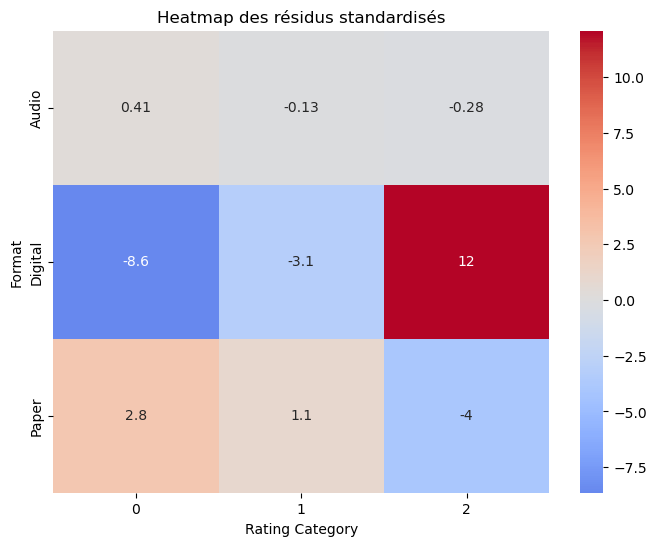

In [75]:
plt.figure(figsize=(8, 6))
sns.heatmap(residuals, annot=True, cmap="coolwarm", center=0)
plt.title("Heatmap des résidus standardisés")
plt.ylabel("Format")
plt.xlabel("Rating Category")
plt.show()

- Le format Digital est nettement associé aux notes élevées qui est la Catégorie 2 et très peu associé aux notes basses Catégorie 0.
- Le format Paper est un peu plus fréquent pour les notes basses et moins présent pour les notes élevées
- Le format Audio ne présente pas de biais marqué en fonction des catégories de notes.